## Лабораторна робота 4 - Навчання без учителя.


У цій лабораторній роботі Ви познайомитеся з основними задачами, які розв'язують алгоритми навчання без учителя.

### Завдання 1

Реалізуйте алгоритм кластеризації k-середніх, доповнивши методи, позначені `#TODO` у класі KMeans.

Метод `distance` повинен повертати матрицю $D_{m\times n}$, де $m,n$ - кількість рядків у $p_1,p_2$ відповідно. $D_{i,j}$ - евклідова відстань між $i$-м рядком $p_1$ і $j$-м рядком $p_2$.
*Порада*: скористайтеся векторизацією, оскільки реалізація через цикли буде значно повільнішою.

Метод `fit` повинен виконувати пошук центроїдів кластерів. Знайдені центроїди мають бути збережені в `self.cluster_centers_`.


Метод `predict` виконує кластеризацію, передбачаючи для кожного елемента `x` індекс відповідного йому кластера.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    @staticmethod
    def distance(p1, p2):
        p1_sq = np.sum(p1 ** 2, axis=1).reshape(-1, 1)
        p2_sq = np.sum(p2 ** 2, axis=1).reshape(1, -1)
        D = np.sqrt(p1_sq + p2_sq - 2 * np.dot(p1, p2.T))
        return D
        
    def fit(self, x):
        random = np.random.default_rng()
        self.cluster_centers_ = x[random.choice(x.shape[0], self.n_clusters, replace=False)]
        
        while True:
            D = self.distance(x, self.cluster_centers_)
            
            labels = D.argmin(axis=1)
            new_cluster_centers = np.array([x[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            
            if np.allclose(new_cluster_centers, self.cluster_centers_):
                break
                
            self.cluster_centers_ = new_cluster_centers
            
        return self
    
    def predict(self, x):
        D = self.distance(x, self.cluster_centers_)
        return D.argmin(axis=1)

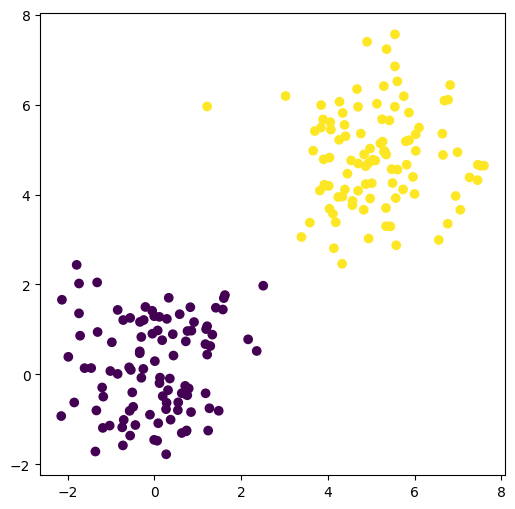

In [3]:
x = np.concatenate([np.random.normal(size=(100, 2)), np.random.normal(size=(100, 2)) + 5])
clust = KMeans(2).fit(x).predict(x)

plt.figure(figsize=(6, 6))
plt.scatter(*x.T, c=clust)
plt.show()

Виберіть будь-яке зображення (тільки не дуже велике, 64х64 підійде ідеально). За допомогою алгоритму k-середніх підберіть оптимальну кількість кластерів для кластеризації пікселів зображення, максимізуючи silhouette-score.

In [4]:
# pip install scikit-image
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import silhouette_score

image = imread('image.jfif')

# Resize if necessary
image = resize(image, (64, 64), preserve_range=True)

pixels = image.reshape(-1, 3)

C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python3

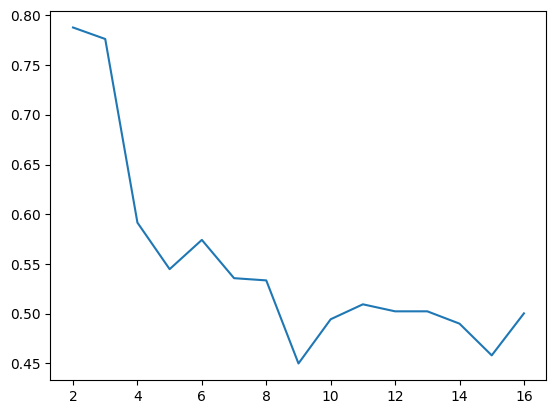

In [43]:
ks = list(range(2, 17))
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(pixels)
    scores.append(silhouette_score(pixels, kmeans.predict(pixels), metric='euclidean'))
    
plt.plot(
    ks,
    scores
)

Візуалізуйте кластеризацію з найкращим $k$.

C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


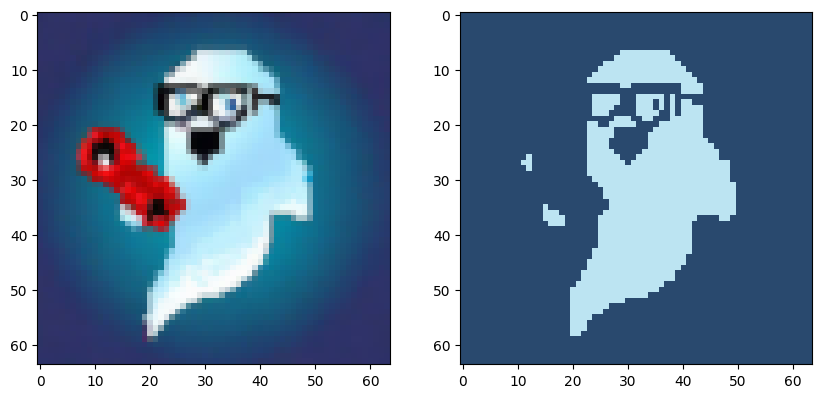

In [10]:
kmeans = KMeans(n_clusters=2).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(pixels_clustered.reshape(image.shape).astype(np.uint8))

За Вашим номером у списку групи, завантажте набір даних:

In [28]:
STUDENT_ID = 20

data = np.load(f'data/{STUDENT_ID:02d}.npy')



Використовуючи метод k-середніх, зробіть висновок про кількість кластерів у наборі даних. Обґрунтуйте Ваш висновок.

In [ ]:
ks = list(range(2, 17))
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(data)
    scores.append(silhouette_score(data, kmeans.predict(data), metric='euclidean'))

plt.plot(
    ks,
    scores
)

optimal_k = ks[np.argmax(scores)]
print(f'Optimal number of clusters: {optimal_k}')

C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\адмін\AppData\Roaming\Python\Python3

### Завдання 2

Реалізуйте алгоритм аналізу головних компонент, доповнивши методи, позначені `#TODO` у класі PCA, і застосуйте його на датасеті MNIST.

Метод `fit` повинен виконувати пошук `self.n_component` головних компонент:

$$
X=[x_{i,j}]_{m\times n}
$$

$$
X_{c}=\begin{bmatrix}x_{i,j}-\frac{1}{m}\sum_{k=1}^mx_{k,j}\end{bmatrix}
$$

$$
C=\frac{X_c^TX_c}{m-1}
$$

Головними компонентами будуть власні вектори матриці $C$, які відповідають `self.n_component` найбільшим власним числам. (Скористайтеся [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)).

Знайдені компоненти мають бути збережені в `self.components_`.

Метод `transform` виконує проекцію даних:
$$
\begin{bmatrix}y_{i,j}-\frac{1}{m}\sum_{k=1}^mx_{k,j}\end{bmatrix}\times V
$$

де $y$ - елементи матриці даних, для яких виконується проекція, $V$ - матриця, сформована з головних компонент. Зверніть увагу, що для нормалізації використовуються середні за тренувальною вибіркою.

In [42]:
with np.load('mnist.npz') as npz:
    x, y = [npz[k] for k in ['x_train', 'y_train']]

x = x.reshape(-1, 784).astype(np.float32)

In [44]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        
        X_c = X - self.mean_
        C = np.dot(X_c.T, X_c) / (X_c.shape[0] - 1)
        eigenvalues, eigenvectors = np.linalg.eig(C)
        
        sorted_indices = np.argsort(eigenvalues)[::-1]
        top_indices = sorted_indices[:self.n_components]
        self.components_ = eigenvectors[:, top_indices]

        return self
        
    def transform(self, X):
        X_c = X - self.mean_
        return np.dot(X_c, self.components_)

In [45]:
pca = PCA(n_components=2).fit(x)
x_proj = pca.transform(x)

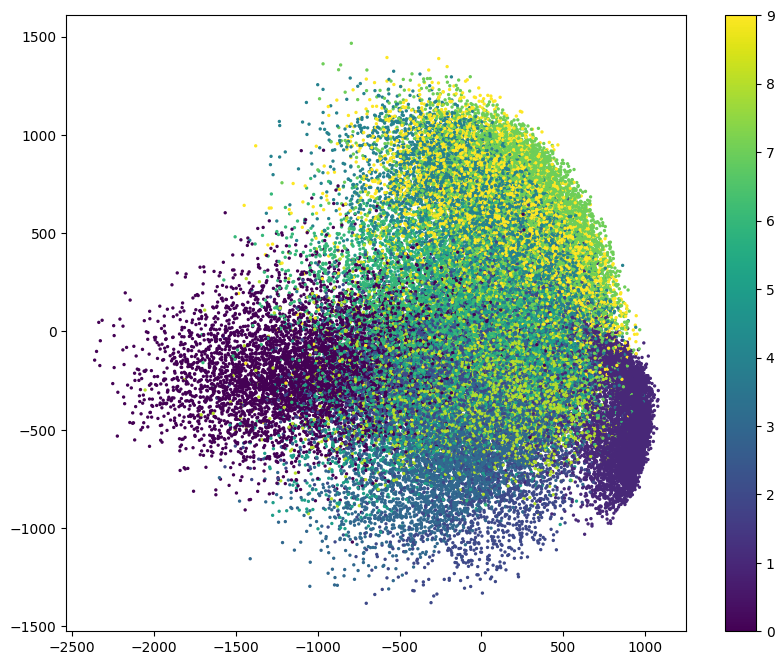

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(*x_proj.T, c=y, s=2)
plt.colorbar()